In [1]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
import numpy as np
from cifParse import *
from MMfunc import *

In [2]:
filename = 'ZnS-Sfaleryt.cif'
CELL = getCellFromFile(filename)

In [4]:
SUPERCELL = supercell(CELL, size = 2)
# print(SUPERCELL)

[[-1.   -1.   -1.  ]
 [-1.   -1.    0.  ]
 [-1.   -1.    1.  ]
 [-1.   -0.5  -0.5 ]
 [-1.   -0.5   0.5 ]
 [-1.    0.   -1.  ]
 [-1.    0.    0.  ]
 [-1.    0.    1.  ]
 [-1.    0.5  -0.5 ]
 [-1.    0.5   0.5 ]
 [-1.    1.   -1.  ]
 [-1.    1.    0.  ]
 [-1.    1.    1.  ]
 [-0.75 -0.75 -0.75]
 [-0.75 -0.75  0.25]
 [-0.75 -0.25 -0.25]
 [-0.75 -0.25  0.75]
 [-0.75  0.25 -0.75]
 [-0.75  0.25  0.25]
 [-0.75  0.75 -0.25]
 [-0.75  0.75  0.75]
 [-0.5  -1.   -0.5 ]
 [-0.5  -1.    0.5 ]
 [-0.5  -0.5  -1.  ]
 [-0.5  -0.5   0.  ]
 [-0.5  -0.5   1.  ]
 [-0.5   0.   -0.5 ]
 [-0.5   0.    0.5 ]
 [-0.5   0.5  -1.  ]
 [-0.5   0.5   0.  ]
 [-0.5   0.5   1.  ]
 [-0.5   1.   -0.5 ]
 [-0.5   1.    0.5 ]
 [-0.25 -0.75 -0.25]
 [-0.25 -0.75  0.75]
 [-0.25 -0.25 -0.75]
 [-0.25 -0.25  0.25]
 [-0.25  0.25 -0.25]
 [-0.25  0.25  0.75]
 [-0.25  0.75 -0.75]
 [-0.25  0.75  0.25]
 [ 0.   -1.   -1.  ]
 [ 0.   -1.    0.  ]
 [ 0.   -1.    1.  ]
 [ 0.   -0.5  -0.5 ]
 [ 0.   -0.5   0.5 ]
 [ 0.    0.   -1.  ]
 [ 0.    0.  

In [9]:
def usunkoor(koorZEW, oski):
    koorWEW = koorZEW.copy()
    for os in oski:
        j = 1
        while j < len(koorWEW):            
            for punktdous in listadous(os, koorWEW[j]):                
                i = findindex(punktdous, koorWEW.T[:,j:])                
                if i + 1 and porownajPunkty(koorWEW[i+j],punktdous):
                    koorWEW = np.delete(koorWEW, i+j, 0)
            j += 1
    return koorWEW

Matrixes = generateSymetryBase()

oski1 = [Matrixes["m"][os] for os in Matrixes["m"]][3:] 
oski2 =  [Matrixes["-4"][os] for os in Matrixes["-4"]] + [Matrixes["3"][os] for os in Matrixes["3"]][1:]
oski = oski1 + oski2
SUPERCELL = supercell(CELL, size = 8)
lol = usunkoor(SUPERCELL, oski)

In [10]:
for el in lol:
    print(el)

[-1. -1. -1.]
[-1.   -1.   -0.75]
[-1.  -1.  -0.5]
[-1.   -1.   -0.25]
[-1. -1.  0.]
[-1.   -1.    0.25]
[-1.  -1.   0.5]
[-1.   -1.    0.75]
[-1. -1.  1.]
[-1.    -0.875 -0.875]
[-1.    -0.875 -0.625]
[-1.    -0.875 -0.375]
[-1.    -0.875 -0.125]
[-1.    -0.875  0.125]
[-1.    -0.875  0.375]
[-1.    -0.875  0.625]
[-1.    -0.875  0.875]
[-1.   -0.75 -0.75]
[-1.   -0.75 -0.5 ]
[-1.   -0.75 -0.25]
[-1.   -0.75  0.  ]
[-1.   -0.75  0.25]
[-1.   -0.75  0.5 ]
[-1.   -0.75  0.75]
[-1.    -0.625 -0.625]
[-1.    -0.625 -0.375]
[-1.    -0.625 -0.125]
[-1.    -0.625  0.125]
[-1.    -0.625  0.375]
[-1.    -0.625  0.625]
[-1.  -0.5 -0.5]
[-1.   -0.5  -0.25]
[-1.  -0.5  0. ]
[-1.   -0.5   0.25]
[-1.  -0.5  0.5]
[-1.    -0.375 -0.375]
[-1.    -0.375 -0.125]
[-1.    -0.375  0.125]
[-1.    -0.375  0.375]
[-1.   -0.25 -0.25]
[-1.   -0.25  0.  ]
[-1.   -0.25  0.25]
[-1.    -0.125 -0.125]
[-1.    -0.125  0.125]
[-1.  0.  0.]
[-1.  1.  1.]
[-0.9375 -0.9375 -0.9375]
[-0.9375 -0.9375 -0.6875]
[-0.9375 -0.9

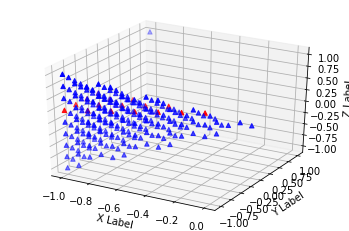

In [11]:
# SUPERCELL = supercell(CELL, size = 1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#for c, m in [('r', 'o'), ('b', '^')]:
POMCELL = lol
var = np.unique(np.argwhere(POMCELL==0.25)[:,0])
l1 = POMCELL[var]
xs, ys, zs = l1.T
ax.scatter(xs, ys, zs, c="r", marker="^")

mojalista2 = POMCELL
mojalista2  = np.delete(mojalista2, var, 0)
xs, ys, zs = mojalista2.T
ax.scatter(xs, ys, zs, c="b", marker="^")

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()